## Observations and Insights 

In [56]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata_copy.csv"
study_results_path = "Resources/Study_results_copy.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, how = "left", on = ["Mouse ID"])

# Display the data table for preview
merged_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
mice = merged_df["Mouse ID"].unique()
mice_count = len(mice)
mice_count

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouse = study_results.loc[study_results.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()

clean_clinical_trial_df = study_results[study_results['Mouse ID'].isin(dup_mouse)==False]
clean_mouse_df = mouse_metadata[mouse_metadata['Mouse ID'].isin(dup_mouse)==False]

# Creating new DF by dropping duplicated mouse by its ID
combined_data = pd.merge(clean_clinical_trial_df, clean_mouse_df, on = "Mouse ID")
combined_data

sort_by_time = combined_data.sort_values("Timepoint", ascending= True) 
all_sort_by_time = sort_by_time.reset_index()
del all_sort_by_time['index']
all_sort_by_time.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,v409,0,45.0,0,Placebo,Female,16,25
2,u946,0,45.0,0,Propriva,Male,5,30
3,w140,0,45.0,0,Zoniferol,Female,19,30
4,a577,0,45.0,0,Infubinol,Female,6,25


In [5]:
# Checking the number of mice in the clean DataFrame.
mice_clean = all_sort_by_time["Mouse ID"].unique()
mice_clean_count = len(mice_clean)
mice_clean_count

248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
drug_groupby = all_sort_by_time.groupby(["Drug Regimen"])

drug_mean = drug_groupby["Tumor Volume (mm3)"].mean()
drug_median = drug_groupby["Tumor Volume (mm3)"].median()
drug_variance = drug_groupby["Tumor Volume (mm3)"].var()
drug_std = drug_groupby["Tumor Volume (mm3)"].std()
drug_sem = drug_groupby["Tumor Volume (mm3)"].sem()




In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

summary_statistics = pd.DataFrame({"Mean": drug_mean,
                                  "Median" : drug_median,
                                  "Variance" : drug_variance,
                                  "Standard Deviation" : drug_std,
                                  "SEM" : drug_sem})

summary_statistics

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

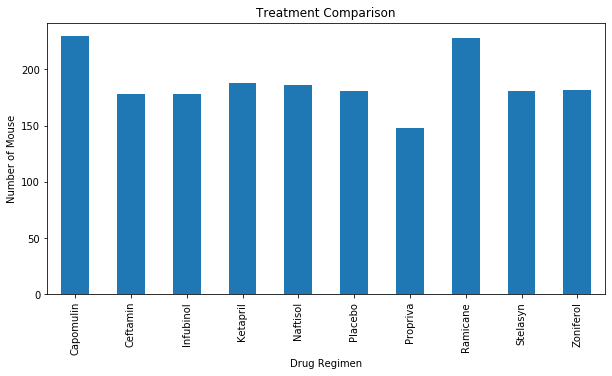

<Figure size 432x288 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

treatment_vs_mouse = all_sort_by_time.groupby(["Drug Regimen"]).count()["Mouse ID"]
treatment_vs_mouse

treatment_vs_mouse.plot(kind = "bar", figsize=(10,5))

plt.title("Treatment Comparison")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mouse")

plt.show()
plt.tight_layout()


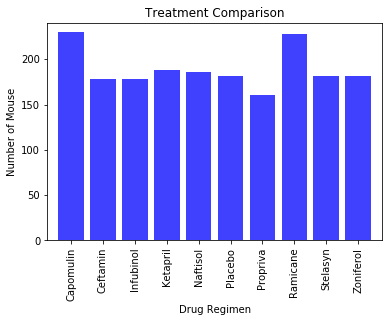

<Figure size 432x288 with 0 Axes>

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
users = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]
x_axis = np.arange(len(treatment_vs_mouse))

plt.bar(x_axis, users, color='b', alpha=0.75, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(users)+10)

plt.title("Treatment Comparison")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mouse")

plt.show()
plt.tight_layout()



In [ ]:
gender_group = all_sort_by_time.groupby(["Mouse ID","Sex"])
mouse_gender_df = pd.DataFrame(gender_group.size())

mouse_gender = pd.DataFrame(mouse_gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"]

mouse_gender


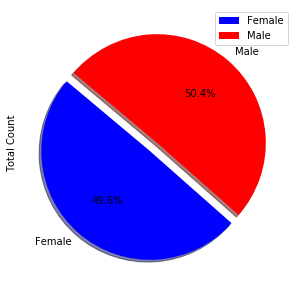

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
colors = ['blue', 'red']
explode = (0.1, 0)
plot = mouse_gender.plot.pie(y='Total Count',figsize=(5,5), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")


(-1.1879383453817904,
 1.111754351424799,
 -1.1987553745848882,
 1.1126035084692154)

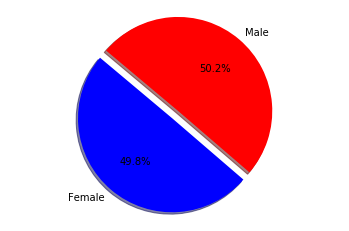

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Female","Male"]
sizes = [49.799197,50.200803]
colors = ['blue', 'red']
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [69]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

best_regimens = all_sort_by_time[all_sort_by_time["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
best_regimens = best_regimens.sort_values(["Timepoint"], ascending=True)
best_regimens_data = best_regimens[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
best_regimens_data

best_regimens_sort = best_regimens_data.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
best_regimens_sort.head()




Drug Regimen  Mouse ID
Capomulin     b128        38.982878
              b742        38.939633
              f966        30.485985
              g288        37.074024
              g316        40.159220
Name: Tumor Volume (mm3), dtype: float64

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
best_regimens_sort = best_regimens_data.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
best_regimen_df = best_regimens_sort.to_frame()
best_regimen_df

top_4_treatments = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

In [82]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    
    # Determine outliers using upper and lower bounds
    
for each_treatment in treatment:
    tumor_volume.append()
    

TypeError: append() takes exactly one argument (0 given)

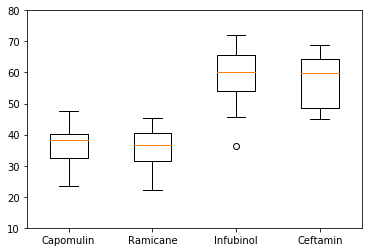

In [81]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_df = best_regimen_df.reset_index()
tumor_lists = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df = tumor_list_df.reindex(top_4_treatments)
tumor_vols = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_vols, labels=top_4_treatments)
plt.ylim(10, 80)
plt.show()

## Line and Scatter Plots

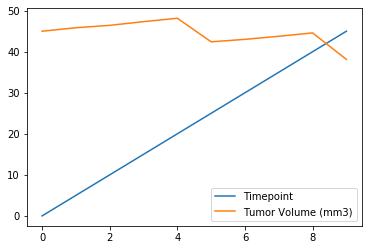

In [26]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
time_tumor = all_sort_by_time[all_sort_by_time["Mouse ID"].isin(["j119"])]
time_tumor

time_vs_tumor_data = time_tumor[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
time_vs_tumor_data

line_plot_df = time_vs_tumor_data.reset_index()
line_plot_df

#plot

line_plot_final = line_plot_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
line_plot_final

lines = line_plot_final.plot.line()

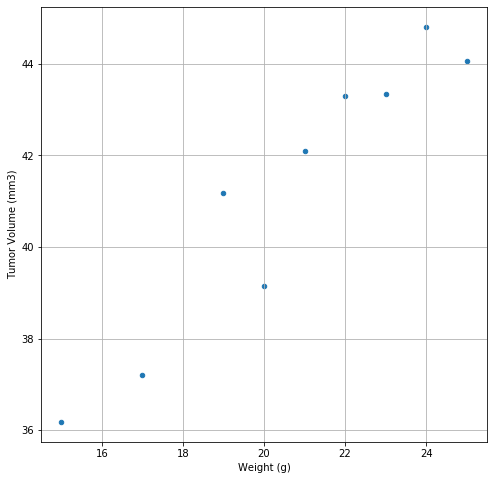

In [63]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_scatter = all_sort_by_time[all_sort_by_time["Drug Regimen"].isin(["Capomulin"])]

capomulin_scatter_df = best_regimens[["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]]

capomulin_scatter_plot = capomulin_scatter.reset_index()
capomulin_sorted = capomulin_scatter_plot.sort_values(["Weight (g)"], ascending=True)
capomulin_grouped_weight = capomulin_scatter_plot.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()
capomulin_grouped_plot = pd.DataFrame(capomulin_grouped_weight).reset_index()
capomulin_grouped_plot.head()
#plot
capomulin_scatter = capomulin_grouped_plot.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', grid = True, figsize= (8,8))



## Correlation and Regression

In [61]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

mouse_weight = capomulin_grouped_plot.iloc[:,0]
average_tumor = capomulin_grouped_plot.iloc[:,1]
correlation = st.pearsonr(mouse_weight, average_tumor)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.95


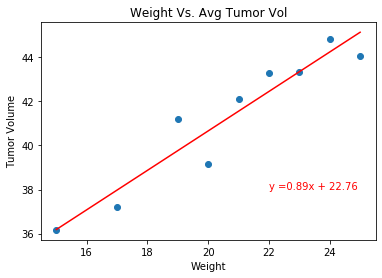

In [62]:
x_values = capomulin_grouped_plot["Weight (g)"]
y_values = capomulin_grouped_plot["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(22,38),fontsize=10,color="red")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume")
plt.title("Weight Vs. Avg Tumor Vol")
plt.show()
